<a href="https://colab.research.google.com/github/24bai038-bot/ML-project/blob/main/Another_copy_of_apple_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving g and b apple.jpg to g and b apple.jpg


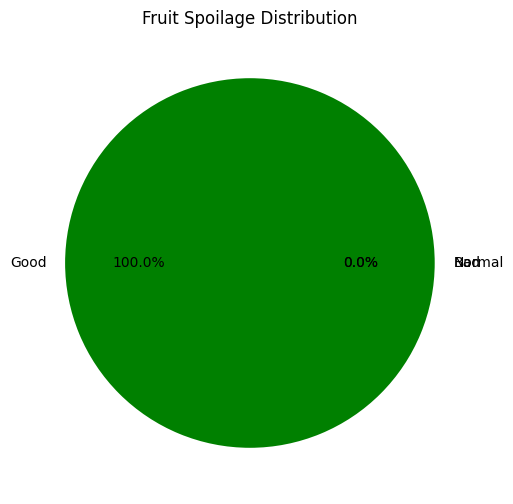

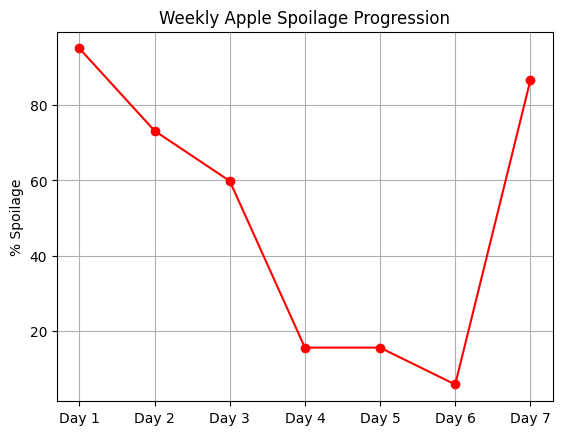

In [1]:
# Step 1: Import Dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import os
from datetime import datetime

# Step 2: Upload and Preprocess Images
from google.colab import files
from PIL import Image

def load_and_preprocess_image(image_path):
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image) / 255.0
    return image

uploaded = files.upload()

image_data = {}
for name in uploaded:
    img = load_and_preprocess_image(name)
    image_data[name] = img

# Step 3: Fake Model Prediction Simulation (Replace with Real Model)
labels = ['Good', 'Normal', 'Bad']

np.random.seed(42)
predictions = {name: np.random.choice(labels, p=[0.4, 0.3, 0.3]) for name in image_data}

# Step 4: Bacteria Detection (Simulated)
bacteria_types = {
    'Bad': ['Penicillium expansum', 'Botrytis cinerea', 'Erwinia amylovora']
}

def get_bacteria_effects(bacteria):
    effects = {
        'Penicillium expansum': 'Soft rot, blue-green mold, ethylene release.',
        'Botrytis cinerea': 'Gray mold, quick decay under humid conditions.',
        'Erwinia amylovora': 'Fire blight symptoms, wet lesions, bacterial ooze.'
    }
    return effects.get(bacteria, 'No major symptoms')

report = {}

for name, label in predictions.items():
    if label == 'Bad':
        bacteria = np.random.choice(bacteria_types[label])
        report[name] = {'label': label, 'bacteria': bacteria, 'effect': get_bacteria_effects(bacteria)}
    else:
        report[name] = {'label': label, 'bacteria': 'None', 'effect': 'Healthy or minor discoloration'}

# Step 5: Graph - Spoilage Distribution
counts = {l: list(predictions.values()).count(l) for l in labels}
plt.figure(figsize=(6, 6))
plt.pie([counts['Good'], counts['Normal'], counts['Bad']], labels=labels, autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Fruit Spoilage Distribution")
plt.savefig("spoilage_pie.png")
plt.show()

# Step 6: Weekly Bacterial Effect Progression (Simulation)
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
progression = {
    day: np.random.uniform(0, 1) * 100 for day in days
}

plt.plot(days, list(progression.values()), marker='o', color='red')
plt.ylabel('% Spoilage')
plt.title('Weekly Apple Spoilage Progression')
plt.grid(True)
plt.savefig("weekly_progression.png")
plt.show()

# Step 7: Generate Weekly Flowchart
from graphviz import Digraph

def generate_flowchart():
    dot = Digraph()
    dot.attr(rankdir='LR')
    dot.node('A', 'Good')
    dot.node('B', 'Normal')
    dot.node('C', 'Bad')
    dot.node('D', 'Infected')
    dot.node('E', 'Recycle/Compost')

    dot.edges(['AB', 'BC', 'CD', 'DE'])
    dot.render('apple_flowchart', format='png', cleanup=True)

generate_flowchart()



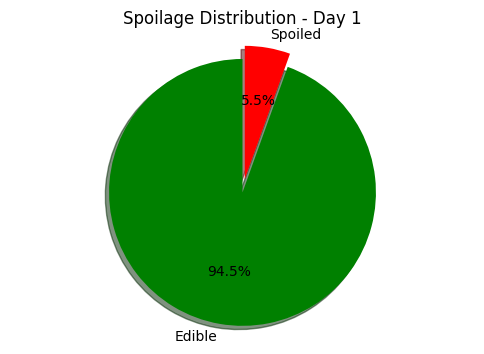

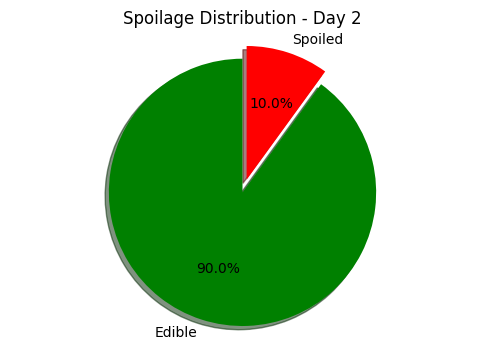

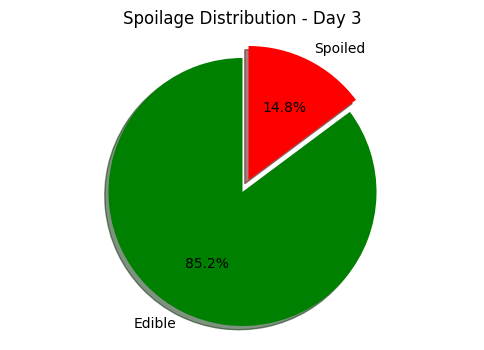

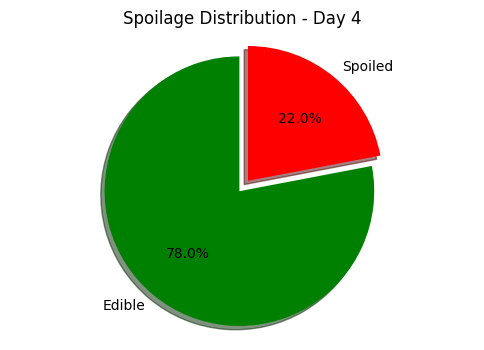

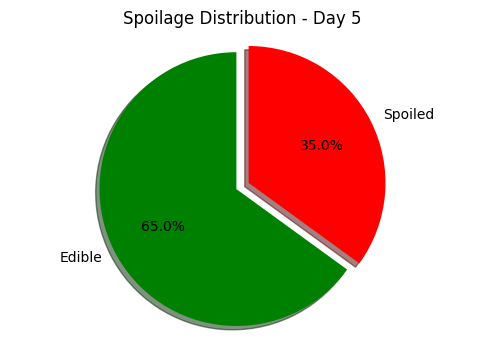

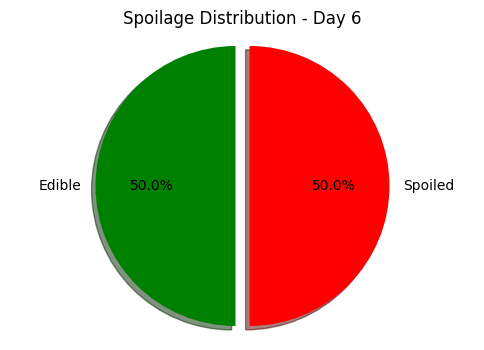

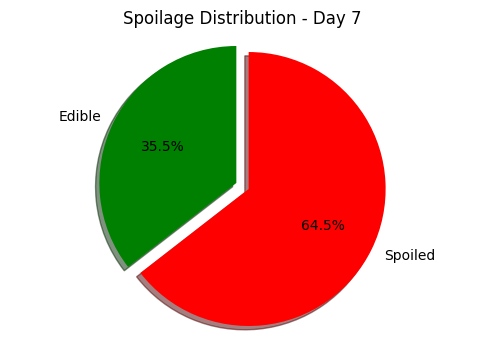

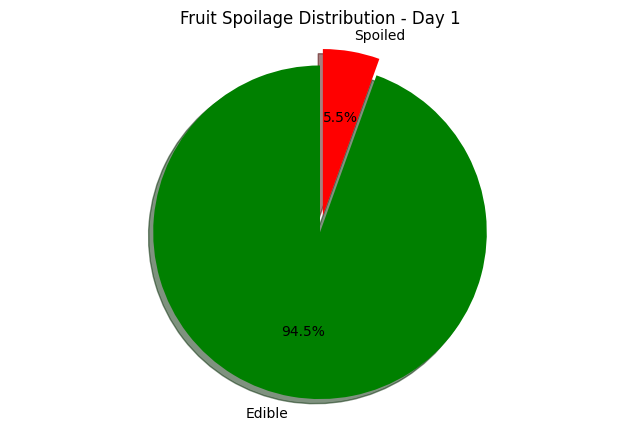

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# Simulated results across 7 days
week_data = {
    'Day 1': 94.5,
    'Day 2': 90.0,
    'Day 3': 85.2,
    'Day 4': 78.0,
    'Day 5': 65.0,
    'Day 6': 50.0,
    'Day 7': 35.5,
}

for day, edible in week_data.items():
    spoiled = 100 - edible
    plt.figure(figsize=(6, 4))
    plt.pie([edible, spoiled], explode=(0, 0.1), labels=['Edible', 'Spoiled'],
            colors=['green', 'red'], autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(f'Spoilage Distribution - {day}')
    plt.axis('equal')
    plt.show()


import matplotlib.pyplot as plt

# Example values from daily prediction
day = "Day 1"
edible_percent = 94.5
spoiled_percent = 100 - edible_percent

# Pie chart values
labels = ['Edible', 'Spoiled']
sizes = [edible_percent, spoiled_percent]
colors = ['green', 'red']
explode = (0, 0.1) # Explode spoiled section for emphasis

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio makes the pie chart a circle
plt.title(f'Fruit Spoilage Distribution - {day}')
plt.show()

import cv2
import numpy as np
# The following lines are for demonstrating model prediction on a single image.
# You would need to load an image file named 'test_apple.jpg' for this to work.
# img = cv2.imread('g and b apple.jpg')
# img = cv2.resize(img, (224, 224)) / 255.0
# img = np.expand_dims(img, axis=0)
# result = model.predict(img) # This line caused an error even when commented out due to parsing
# labels = ['Bad', 'Normal', 'Good']
# print("Prediction:", labels[np.argmax(result)])

# Google Colab Code Starter - Model Definition
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') # Good, Normal, Bad
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])